In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# Preprocessing

## 1. loading dataset

In [58]:
raw_data = pd.read_csv('./crx.data', header=None, na_values="?")
cont_attr = [1,2,7,10,13,14]
dist_attr = []
for i in range(15):
    if i not in cont_attr:
        dist_attr.append(i)

## 2. Handling missing values

In [59]:
# Continuous => mean
# Disctrete => mod
print("Before Preprocessing:",raw_data.isna().sum())
for index in range(15):
    if index in cont_attr:
        _mean = raw_data[index].mean()
        raw_data[index] = raw_data[index].replace(math.nan, _mean)
        continue
    _mode = raw_data[index].mode()[0]
    raw_data[index] = raw_data[index].replace(math.nan, _mode)

print("After Preprocessing:",raw_data.isna().sum())

Before Preprocessing: 0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64
After Preprocessing: 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64


## 3. Normalization

In [60]:
#  using minmaxScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x = raw_data[cont_attr].values
x_scaled = min_max_scaler.fit_transform(x)

normalized = pd.DataFrame(x_scaled, columns=cont_attr, index=raw_data.index)
raw_data[cont_attr] = normalized
raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,0.256842,0.000000,u,g,w,v,0.043860,t,t,0.014925,f,g,0.1010,0.00000,+
1,a,0.675489,0.159286,u,g,q,h,0.106667,t,t,0.089552,f,g,0.0215,0.00560,+
2,a,0.161654,0.017857,u,g,q,h,0.052632,t,f,0.000000,f,g,0.1400,0.00824,+
3,b,0.211729,0.055000,u,g,w,v,0.131579,t,t,0.074627,t,g,0.0500,0.00003,+
4,b,0.096541,0.200893,u,g,w,v,0.060000,t,f,0.000000,f,s,0.0600,0.00000,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,0.110226,0.360179,y,p,e,h,0.043860,f,f,0.000000,f,g,0.1300,0.00000,-
686,a,0.134135,0.026786,u,g,c,v,0.070175,f,t,0.029851,t,g,0.1000,0.00394,-
687,a,0.172932,0.482143,y,p,ff,ff,0.070175,f,t,0.014925,t,g,0.1000,0.00001,-
688,b,0.062707,0.007321,u,g,aa,v,0.001404,f,f,0.000000,f,g,0.1400,0.00750,-


## 4. Converting Nominals into Numerical 

In [61]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=np.int32)
raw_data[15] = ord_enc.fit_transform(raw_data[[15]])

raw_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,0.256842,0.000000,u,g,w,v,0.043860,t,t,0.014925,f,g,0.1010,0.00000,0
1,a,0.675489,0.159286,u,g,q,h,0.106667,t,t,0.089552,f,g,0.0215,0.00560,0
2,a,0.161654,0.017857,u,g,q,h,0.052632,t,f,0.000000,f,g,0.1400,0.00824,0
3,b,0.211729,0.055000,u,g,w,v,0.131579,t,t,0.074627,t,g,0.0500,0.00003,0
4,b,0.096541,0.200893,u,g,w,v,0.060000,t,f,0.000000,f,s,0.0600,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,0.110226,0.360179,y,p,e,h,0.043860,f,f,0.000000,f,g,0.1300,0.00000,1
686,a,0.134135,0.026786,u,g,c,v,0.070175,f,t,0.029851,t,g,0.1000,0.00394,1
687,a,0.172932,0.482143,y,p,ff,ff,0.070175,f,t,0.014925,t,g,0.1000,0.00001,1
688,b,0.062707,0.007321,u,g,aa,v,0.001404,f,f,0.000000,f,g,0.1400,0.00750,1


In [62]:
one_hot = pd.get_dummies(raw_data[dist_attr])
raw_data = raw_data.drop(dist_attr, axis=1)
X = raw_data.join(one_hot)
X

,1,2,7,10,13,14,15,0_a,0_b,3_l,...,6_z,8_f,8_t,9_f,9_t,11_f,11_t,12_g,12_p,12_s
0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000,0,False,True,False,...,False,False,True,False,True,True,False,True,False,False
1,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560,0,True,False,False,...,False,False,True,False,True,True,False,True,False,False
2,0.161654,0.017857,0.052632,0.000000,0.1400,0.00824,0,True,False,False,...,False,False,True,True,False,True,False,True,False,False
3,0.211729,0.055000,0.131579,0.074627,0.0500,0.00003,0,False,True,False,...,False,False,True,False,True,False,True,True,False,False
4,0.096541,0.200893,0.060000,0.000000,0.0600,0.00000,0,False,True,False,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.110226,0.360179,0.043860,0.000000,0.1300,0.00000,1,False,True,False,...,False,True,False,True,False,True,False,True,False,False
686,0.134135,0.026786,0.070175,0.029851,0.1000,0.00394,1,True,False,False,...,False,True,False,False,True,False,True,True,False,False
687,0.172932,0.482143,0.070175,0.014925,0.1000,0.00001,1,True,False,False,...,False,True,False,False,True,False,True,True,False,False
688,0.062707,0.007321,0.001404,0.000000,0.1400,0.00750,1,False,True,False,...,False,True,False,True,False,True,False,True,False,False


# Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

Y = np.array(X.pop(15))
X = np.array(X)

print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.2)
print(X_test.shape, X_train.shape)

(690, 46) (690,)
(138, 46) (552, 46)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from KNN.KNN import KNN
from KNN.Metrics import Metrics

In [70]:

knn = KNeighborsClassifier(n_neighbors=7, )
knn.fit(X_train, Y_train)

predictions = knn.predict(X_test)

score = knn.score(X_test, Y_test)
my_knn = KNN(distance_metric=Metrics.Lp, p=2, k=7)
print(my_knn.score(Y_test, predictions))
print(score)
print(mean_squared_error(Y_test, predictions))

0.7095959595959596
0.927536231884058
0.07246376811594203


In [71]:
from KNN.KNN import KNN
from KNN.Metrics import Metrics

my_knn = KNN(distance_metric=Metrics.Euc, k=7)
my_knn.fit(X_train=X_train, y_train=Y_train)

predictions = my_knn.predict(X_test)
print(my_knn.score(Y_test, predictions))
print(mean_squared_error(Y_test, predictions))

0.7095959595959596
0.07246376811594203


## Hyper Parameter Optimization (blind search approach)

In [72]:
scores = []
for i in range(1,101, 2):
    _knn = KNeighborsClassifier(n_neighbors=i)
    _knn.fit(X_train, Y_train)
    scores.append(_knn.score(X_test, Y_test))



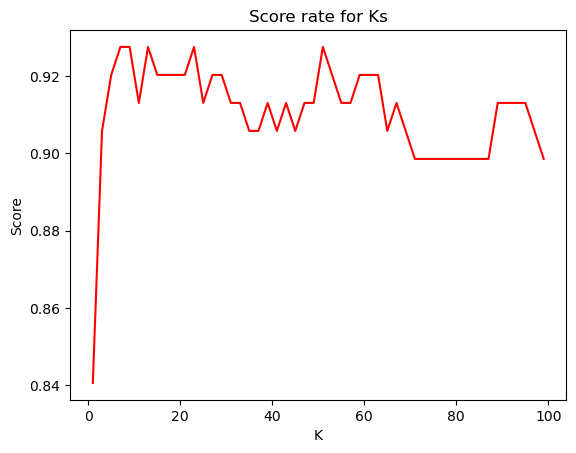

In [73]:
plt.plot(list(range(1,101,2)), scores, color="red")

plt.xlabel('K')
plt.ylabel("Score")

plt.title("Score rate for Ks")
plt.show()


In [74]:
scores = np.array(scores)
max_score_ind = np.argmax(scores)
print(max_score_ind*2 +1)

7
